In [2]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.visualization import astropy_mpl_style
import os
from astropy.io import fits

In [2]:
#exemplos aleatórios
star = 'Sol'
teff = 5000
logg=10
feh=0
snr=9
spectrum = 'spectrum'
vrot = 20
vrot_err=0.5
vmac = 9
status = 'cool'
vsini_final_err = 0.6

In [3]:
print ('results:','\nstar=', star,'\nteff=', teff,'\nlogg=', logg,'\nfeh=', feh,'\nsnr=', snr,'\nspectrum=', spectrum,'\nvrot=', vrot,'\nvrot_err=', vrot_err,'\nvmac=', vmac,'\nstatus=', status, '\nvsini_final_err=', vsini_final_err)

results: 
star= Sol 
teff= 5000 
logg= 10 
feh= 0 
snr= 9 
spectrum= spectrum 
vrot= 20 
vrot_err= 0.5 
vmac= 9 
status= cool 
vsini_final_err= 0.6


# TOI-908_HARPSS_2021_rv.fits

In [3]:
def get_spectra(fitsfile):
    img_data, img_header = fits.getdata(fitsfile, header=True)
    cdelta1 = img_header['CDELT1']
    crval1  = img_header['CRVAL1']
    npoints = img_header['NAXIS1']
    ll = np.arange(0,npoints)*cdelta1+crval1
    return ll, img_data

In [4]:
#get_spectra('TOI-908_HARPSS_2021_rv.fits')

In [5]:
def plot_spectra(fitsfile):
    ll, img_data = get_spectra(fitsfile)
    plt.plot(ll,img_data)
    plt.title(fitsfile)
    #plt.savefig(fitsfile, format='fits')
    plt.show()
    
    return fitsfile

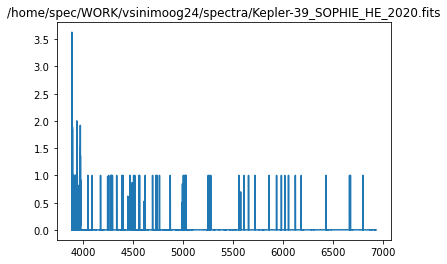

'/home/spec/WORK/vsinimoog24/spectra/Kepler-39_SOPHIE_HE_2020.fits'

In [354]:
plot_spectra('/home/spec/WORK/vsinimoog24/spectra/Kepler-39_SOPHIE_HE_2020.fits')

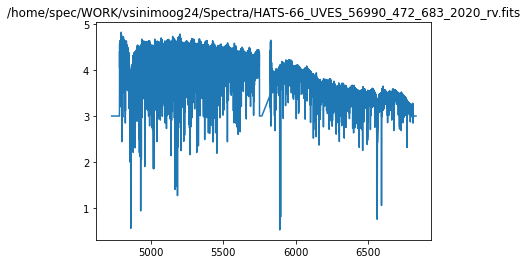

(array([4728.87871997, 4728.88871997, 4728.89871997, ..., 6831.05871997,
        6831.06871997, 6831.07871997]),
 array([3., 3., 3., ..., 3., 3., 3.]))

In [11]:
plot_spectra('/home/spec/WORK/vsinimoog24/Spectra/HATS-66_UVES_56990_472_683_2020_rv.fits')
get_spectra('/home/spec/WORK/vsinimoog24/Spectra/HATS-66_UVES_56990_472_683_2020_rv.fits')

In [122]:
spectra_list = os.listdir('/home/spec/WORK/spectra/test_sample')
#spectra_list

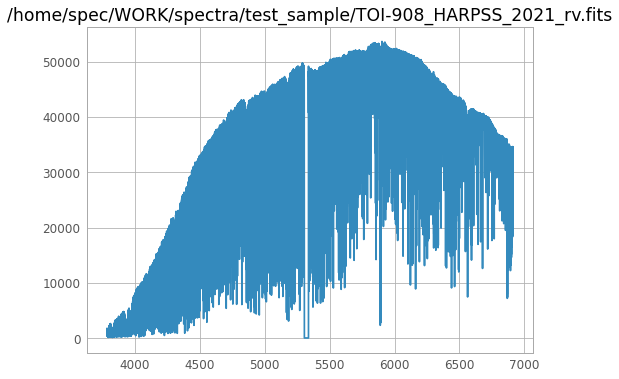

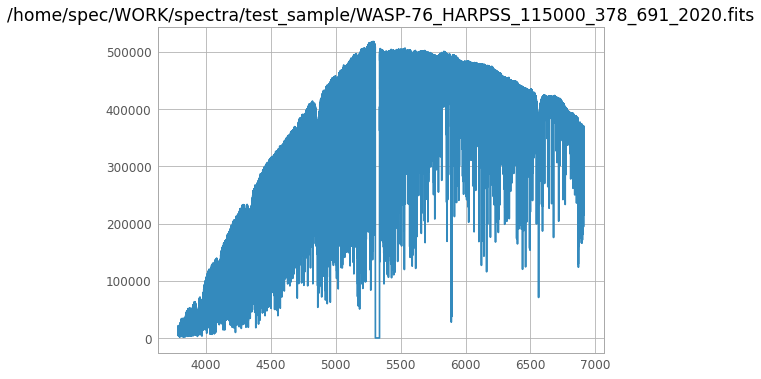

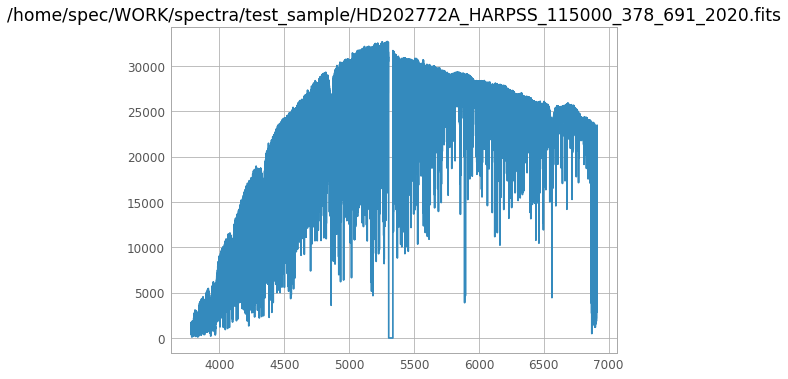

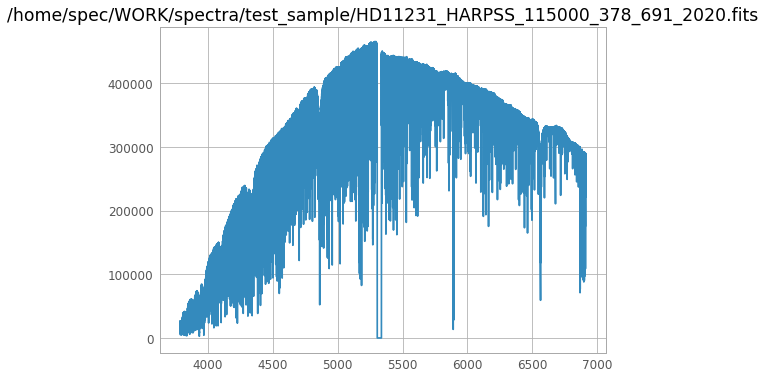

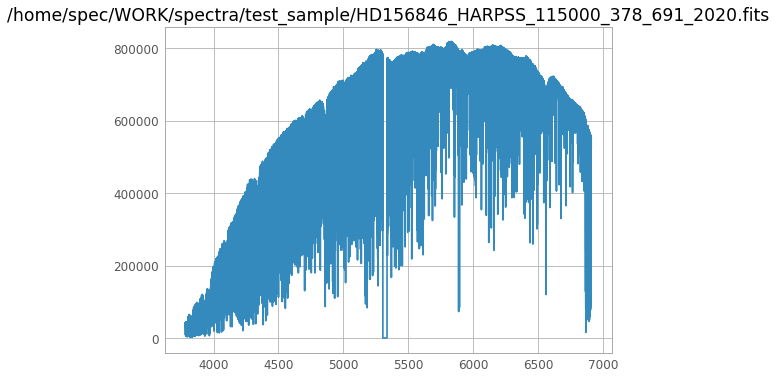

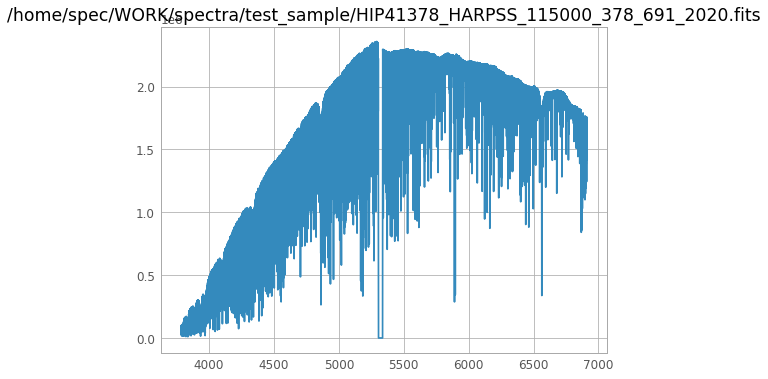

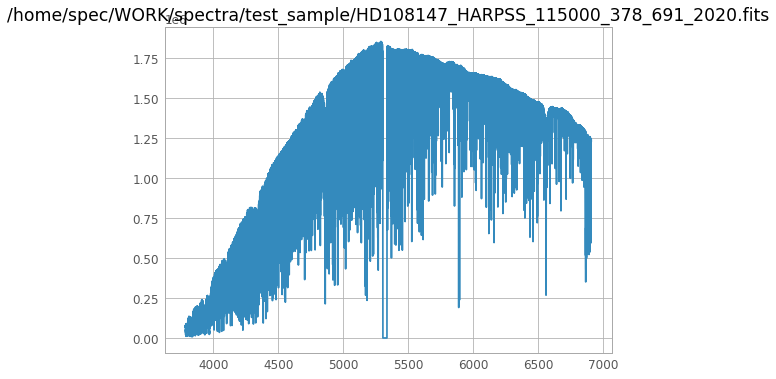

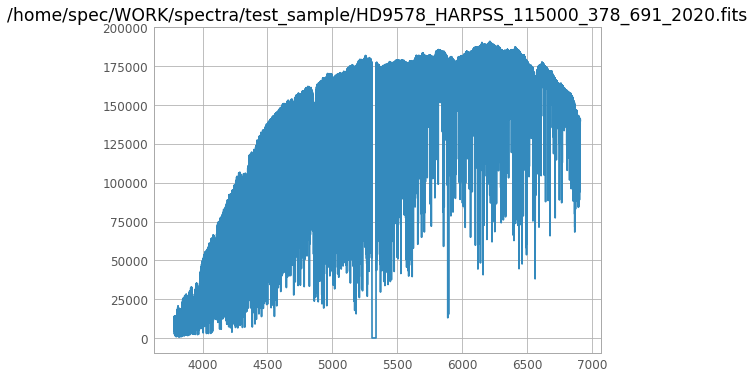

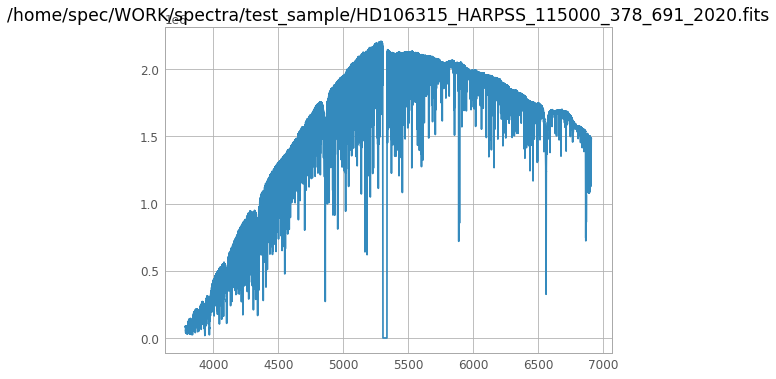

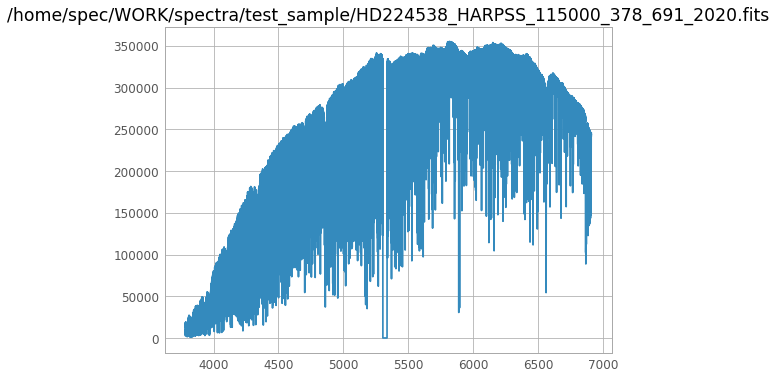

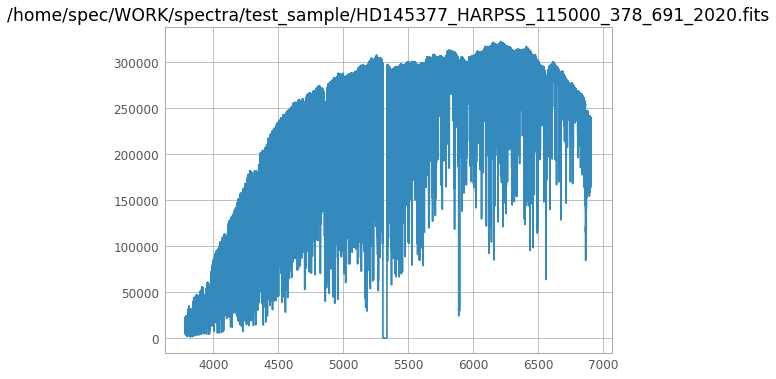

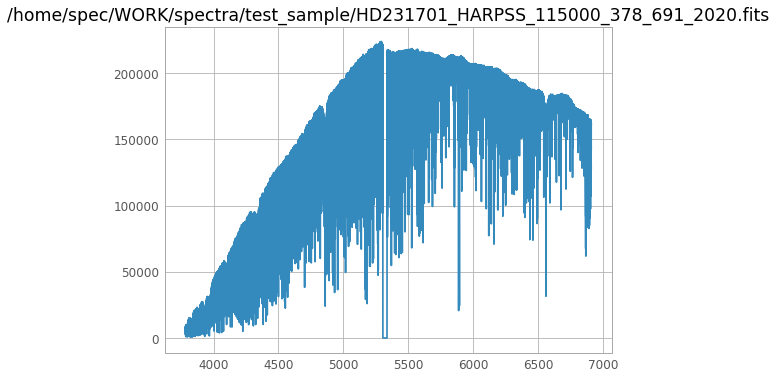

In [123]:
for file in spectra_list:
    if 'fits' in file:
        plot_spectra('/home/spec/WORK/spectra/test_sample/'+file)
        plt.show()

# Correção da Velocidade Radial


In [8]:
import numpy as np
import pandas as pd
from astropy.io import fits
import os
from PyAstronomy import pyasl

PATH_TO_SAVE='/home/spec/WORK/vsinimoog24/Spectra/'

In [356]:
def get_spectra(fitsfile):
    img_data, img_header = fits.getdata(fitsfile, header=True)
    cdelta1 = img_header['CDELT1']
    crval1  = img_header['CRVAL1']
    npoints = img_header['NAXIS1']
    ll = np.arange(0,npoints)*cdelta1+crval1
    return ll, img_data, cdelta1


def treat_rv(name_file,l1,l2,ref):
    
    """
    This function does the correction of the spectrum in radial velocity.
    Parameters:
    -name_file: The name of the file to correct the spectrum.
    -ini: Value of the initial wavelenght
    -inf: value of the final wavelenght
    -ref: reference spectrum
    """
    ll_r, flux_r, snr = get_spectra(name_file)
    ll_r0, flux_r0 , snr0= get_spectra(ref)   #Using a rest frame solar spectrum defined on top
    ini = np.where(ll_r>l1)[0][0]
    inf = np.where(ll_r>l2)[0][0]
    ini2 = np.where(ll_r0>l1)[0][0]
    inf2 = np.where(ll_r0>l2)[0][0]
    rv, cc = pyasl.crosscorrRV(ll_r[ini:inf], flux_r[ini:inf], ll_r0[ini2:inf2], flux_r0[ini2:inf2], -100., 100., 0.1, skipedge=1000)
    maxind = np.argmax(cc)
    rv = rv[maxind]
    print("REF0: Cross-correlation function is maximized at dRV = ", rv, " km/s")
    
    c=299792.458 ### light velocity
    
    File_op=fits.open(name_file)
    Data=File_op[0].data
    Header=File_op[0].header

    nome0=os.path.basename(name_file.split(".fits")[0])

    File_op.close()
    wave_start = Header['CRVAL1']
    wave_delta = Header['CDELT1']
    wave = np.arange(Data.size) * wave_delta + wave_start

    wave_corr=wave/(1+rv/c)

    wave_int=np.arange(wave_corr[0],wave_corr[-1],wave_delta)

    Flux_int=np.interp(wave_int,wave_corr,Data)

    Header["CDELT1"]=wave_delta
    Header["CRVAL1"]=wave_int[0]
    Header["COMMENT"]= "Corrigido na velocidade radial."
    Header["RV"] = rv
    New_name=nome0 + "_rv.fits"
    print(nome0)

    fits.writeto(PATH_TO_SAVE + New_name,Flux_int,Header,overwrite=True)

In [358]:
ref = '/home/spec/Programs/ARES/sun_harps_ganymede.fits'
treat_rv("/home/spec/WORK/vsinimoog24/spectra/Kepler-39_SOPHIE_HE_2020.fits",6000,6500,ref)

REF0: Cross-correlation function is maximized at dRV =  -0.20000000000567297  km/s
Kepler-39_SOPHIE_HE_2020


In [12]:
spectra_ = os.listdir('/home/spec/WORK/vsinimoog24/spectra/')
spectra_

['HR858_HARPSS_115000_378_691_2020.fits',
 'KELT-16_UVES_107200_472_683_2020.fits',
 'HAT-P-66_SOPHIE_HE_2020.fits',
 'K2-290_HARPSS_115000_378_691_2020.fits',
 'CoRoT-6_UVES_2017.fits',
 'WASP-173A_HARPSS_115000_378_691_2020.fits',
 'HD103774A_HARPSS_115000_378_691_2020.fits',
 'HD70573_FEROS_48000_352_921_2020.fits',
 'HATS-58A_HARPSS_115000_378_691_2020.fits',
 'WASP-113_SOPHIE_HE_2020.fits',
 'Pr0211_HARPSN_2020.fits',
 'WASP-103_FIES_2017.fits',
 'CoRoT-3_HARPS_2014.fits',
 'HD286123_HARPSN_2020.fits',
 'HD13908_ESPADONS_65000_2020.fits',
 'WASP-120_UVES_107200_472_683_2020.fits',
 'HD27969_SOPHIE_2017.fits',
 'HD106315_UVES_107200_472_683_2020.fits',
 'HD93963A_SOPHIE_2021.fits',
 'HD19994A_HARPSS_115000_378_691_2020.fits',
 'Kepler-435_SOPHIE_HE_2020.fits',
 'HATS-3_FEROS_48000_352_921_2020.fits',
 'Kepler-39_SOPHIE_HE_2020.fits',
 'TOI1298_rv.fits',
 'KELT-4A_UVES_107200_472_683_2020.fits',
 'resolution_info.txt',
 'WASP-114_FEROS_48000_352_921_2020.fits',
 'HD11231_HARPSS_1150

In [13]:
for i in range (0,len(spectra_)):
    if 'fits' in spectra_[i]:
        treat_rv('/home/spec/WORK/vsinimoog24/spectra/'+spectra_[i], 5000, 6000,ref)
        

REF0: Cross-correlation function is maximized at dRV =  9.499999999993776  km/s
HR858_HARPSS_115000_378_691_2020
REF0: Cross-correlation function is maximized at dRV =  -38.000000000003524  km/s
KELT-16_UVES_107200_472_683_2020
REF0: Cross-correlation function is maximized at dRV =  2.599999999994168  km/s
HAT-P-66_SOPHIE_HE_2020
REF0: Cross-correlation function is maximized at dRV =  19.699999999993196  km/s
K2-290_HARPSS_115000_378_691_2020
REF0: Cross-correlation function is maximized at dRV =  3.1999999999941338  km/s
CoRoT-6_UVES_2017
REF0: Cross-correlation function is maximized at dRV =  -8.00000000000523  km/s
WASP-173A_HARPSS_115000_378_691_2020
REF0: Cross-correlation function is maximized at dRV =  -3.100000000005508  km/s
HD103774A_HARPSS_115000_378_691_2020
REF0: Cross-correlation function is maximized at dRV =  19.199999999993224  km/s
HD70573_FEROS_48000_352_921_2020
REF0: Cross-correlation function is maximized at dRV =  19.499999999993207  km/s
HATS-58A_HARPSS_115000_3

REF0: Cross-correlation function is maximized at dRV =  38.49999999999213  km/s
HAT-P-45_UVES_107200_472_683_2020
REF0: Cross-correlation function is maximized at dRV =  -5.6843418860808015e-12  km/s
HAT-P-46_HARPSN_2020
REF0: Cross-correlation function is maximized at dRV =  0.2999999999942986  km/s
Kepler-420A_HARPSN_2016
REF0: Cross-correlation function is maximized at dRV =  0.2999999999942986  km/s
KPS-1_SOPHIE_HE_2020
REF0: Cross-correlation function is maximized at dRV =  0.09999999999430997  km/s
Kepler-41_SOPHIE_HE_2020
REF0: Cross-correlation function is maximized at dRV =  -3.6000000000054797  km/s
HATS-27_HARPSS_115000_378_691_2020
REF0: Cross-correlation function is maximized at dRV =  -17.800000000004673  km/s
Kepler-65_ESPADONS_65000_2020
REF0: Cross-correlation function is maximized at dRV =  0.2999999999942986  km/s
WASP-153_SOPHIE_HE_2020
REF0: Cross-correlation function is maximized at dRV =  9.59999999999377  km/s
HD205739_HARPSS_115000_378_691_2020
REF0: Cross-corr

In [89]:
x,y,z=get_spectra('/home/spec/WORK/vsinimoog24/Spectra/CoRoT-1_UVES_107200_472_683_2020_rv.fits')

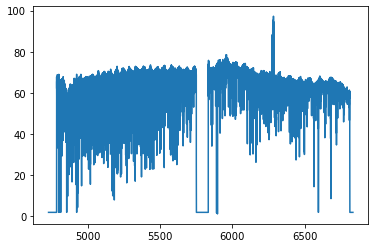

In [90]:
plt.plot(x,y)

In [76]:
len(x)

339243

In [77]:
x[200000]

7700.652

In [79]:
x1,y1,z1=get_spectra('/home/spec/Programs/ARES/sun_harps_ganymede.fits')
np.where(x1>x[200000])

(array([], dtype=int64),)

In [80]:
x1

array([3783.14390541, 3783.15390521, 3783.16390501, ..., 6913.30094507,
       6913.31094487, 6913.32094467])

# Gráficos de comparação

In [10]:
Results = np.array(pd.read_csv("/home/spec/WORK/vsinimoog24/true_results.csv"))
#Results[82][5]

In [11]:
names = []
vrots = []
evrots = []
for i in range(len(Results)):
    if (Results[i][5]) > 0:
        if Results[i][0] not in names:
            names.append(Results[i][0])
            vrots.append(Results[i][5])
            evrots.append(Results[i][9])
#names,vrots

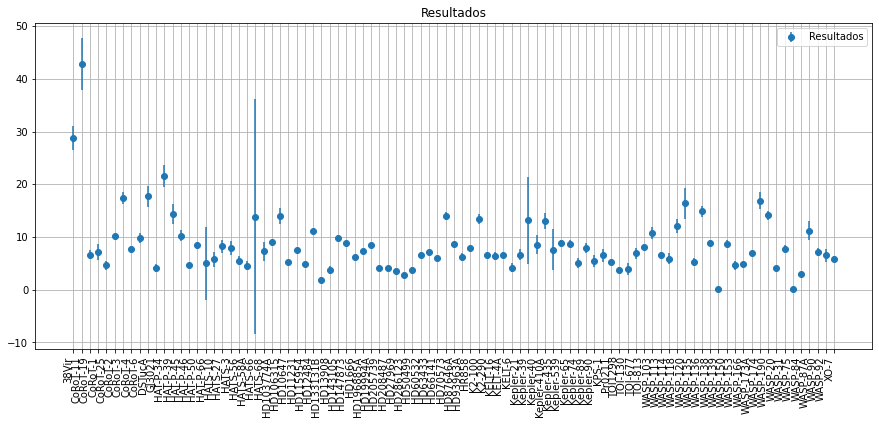

In [12]:
fig, ax = plt.subplots(figsize=(15, 6))
#plt.figure(figsize=(15, 6))
ax.errorbar(names,vrots,yerr=evrots, fmt="o",label="Resultados")
plt.plot(names,vrots, '.')
plt.xticks(rotation=90, ha='right')
plt.legend()
plt.title('Resultados')
plt.grid()

plt.show()

In [22]:
L = pd.read_csv("/home/spec/WORK/vsinimoog24/true_literature.cvs")
L

,star,vsini,err1,err2
0,38Vir,23.10,24.65,23.30
1,CoRoT-11,40.00,5.00,-5.00
2,CoRoT-19,6.00,1.00,-1.00
3,CoRoT-1,5.20,1.00,-1.00
4,CoRoT-25,4.30,0.50,-0.50
...,...,...,...,...
88,WASP-84,4.10,0.30,-0.30
89,WASP-87A,9.90,0.60,-0.60
90,WASP-90,6.00,0.50,-0.50
91,WASP-92,5.73,1.15,-1.15


In [23]:
Literature = [[],[],[]]
#Literaturevel=np.zeros((2,92))
for i in range(len(L)):
    Literature[0].append(str(L['star'][i]))
    Literature[1].append(float(L['vsini'][i]))
    Literature[2].append(float(L['err1'][i]))

In [24]:
#Literature

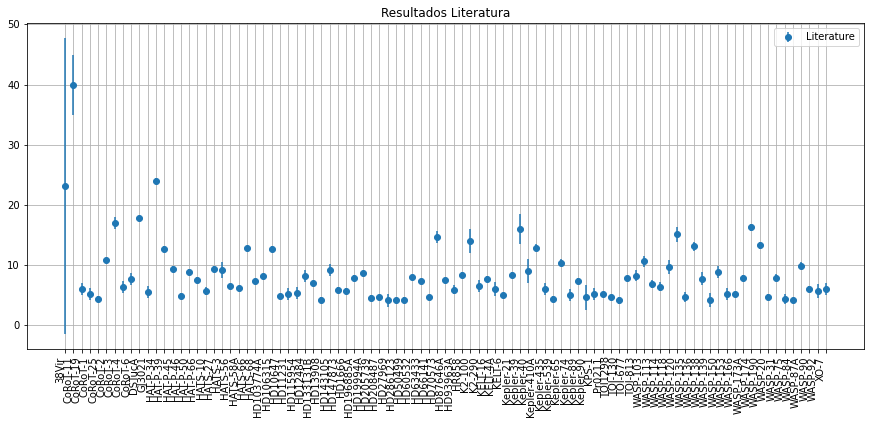

In [25]:
fig, ax = plt.subplots(figsize=(15, 6))
#plt.figure(figsize=(15, 6))
ax.errorbar(Literature[0],Literature[1],yerr=Literature[2], fmt="o",label="Literature")
#ax.errorbar(names,vrots,yerr=evrots, fmt="o",label="MOOG")
plt.plot(Literature[0],Literature[1], '.')
plt.xticks(rotation=90, ha='right')
plt.legend()
plt.title('Resultados Literatura')
plt.grid()

plt.show()

In [26]:
diff = [[],[],[]]
for i in range(len(Literature[0])):
    for j in range(len(names)):
        if Literature[0][i] == names[j]:
            #print(Literature[0][i],names[j])
            diff[0].append(names[j])
            diff[1].append(vrots[j]-Literature[1][i])
            diff[2].append(np.sqrt(evrots[j]**2+Literature[2][i]**2))

In [27]:
str(Literature[0][0]),str(names[0])

('38Vir', '38Vir')

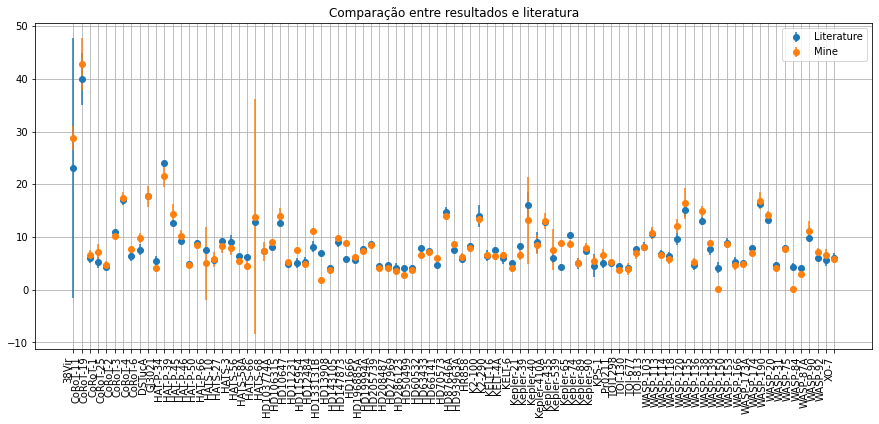

In [28]:
fig, ax = plt.subplots(figsize=(15, 6))
#plt.figure(figsize=(15, 6))
ax.errorbar(Literature[0],Literature[1],yerr=Literature[2], fmt="o",label="Literature")
ax.errorbar(names,vrots,yerr=evrots, fmt="o",label="Mine")
#plt.plot(diff[0],diff[1], '.')
plt.xticks(rotation=90, ha='right')
plt.legend()
plt.title('Comparação entre resultados e literatura')
plt.grid()

plt.show()

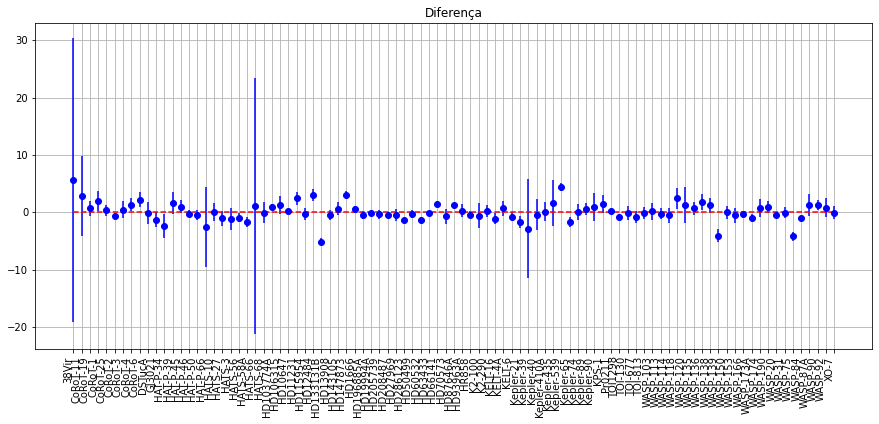

In [33]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.grid()
#ax.errorbar(diff[0][:64],diff[1][:64],yerr=diff[2][:64], fmt="bo")
#ax.errorbar(diff[0][65:],diff[1][65:],yerr=diff[2][65:], fmt="bo")
ax.errorbar(diff[0],diff[1],yerr=diff[2], fmt="bo")
plt.xticks(rotation=90, ha='right')
plt.plot(diff[0],np.zeros(len(diff[0])), 'r--')
#plt.ylim(min(diff[1])-1,10)
#plt.legend()
plt.title('Diferença')
plt.show()


In [436]:
vrots[names.index('HAT-P-66')]

5.0

In [282]:
Literature[1][Literature[0].index('HAT-P-66')]

7.57

In [280]:
diff[1][diff[0].index('HAT-P-66')]

1.6359999999999992

In [283]:
evrots[names.index('HAT-P-66')],Literature[2][Literature[0].index('HAT-P-66')],diff[2][diff[0].index('HAT-P-66')]

(18.859394184331588, 0.5, 18.866021016631993)

In [393]:
P = pd.read_csv("/home/spec/WORK/vsinimoog24/resultspdf.csv")
P

,list
0,38Vir
1,CoRoT-19
2,CoRoT-2
3,GJ3021
4,HAT-P-46
...,...
271,1.163
272,0.641
273,0.283
274,2.140


In [394]:
PreviousResults= [[],[],[]]
#Literaturevel=np.zeros((2,92))
for i in range(92):
    PreviousResults[0].append(str(P['list'][i]))
    PreviousResults[1].append(float(P['list'][i+92]))
    PreviousResults[2].append(float(P['list'][i+184]))

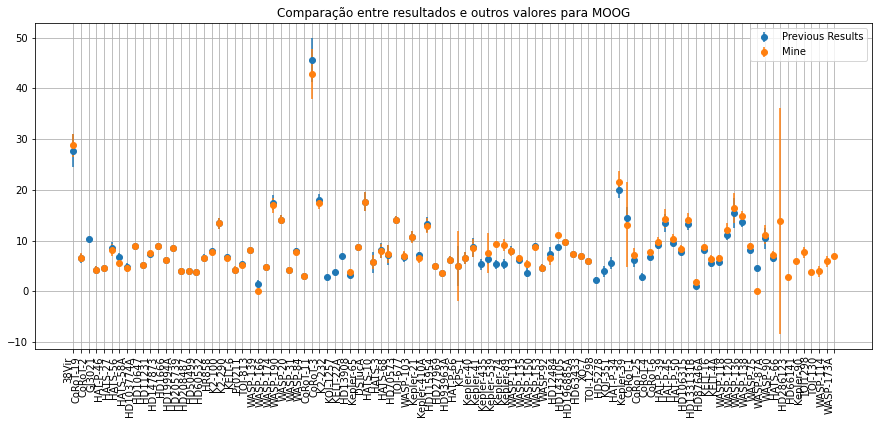

In [395]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.grid()
#plt.figure(figsize=(15, 6))
ax.errorbar(PreviousResults[0],PreviousResults[1],yerr=PreviousResults[2], fmt="o",label="Previous Results")
#ax.errorbar(Literature[0],Literature[1],yerr=Literature[2], fmt="o",label="Literature")
ax.errorbar(names,vrots,yerr=evrots, fmt="o",label="Mine")
#ax.errorbar(names,vrots,yerr=evrots, fmt="o",label="MOOG")
plt.plot(PreviousResults[0],PreviousResults[1], '.')
plt.xticks(rotation=90, ha='right')
plt.legend()
plt.title('Comparação entre resultados e outros valores para MOOG')
plt.show()

In [303]:
evrots[names.index('WASP-135')]

0.7795575668287754

In [304]:
PreviousResults[2][PreviousResults[0].index('WASP-135')]

0.815

In [396]:
diff2 = [[],[],[]]
for i in range(len(PreviousResults[0])):
    for j in range(len(names)):
        if PreviousResults[0][i] == names[j]:
            #print(PreviousResults[0][i],names[j])
            diff2[0].append(names[j])
            diff2[1].append(vrots[j]-PreviousResults[1][i])
            diff2[2].append(np.sqrt(evrots[j]**2+PreviousResults[2][i]**2))

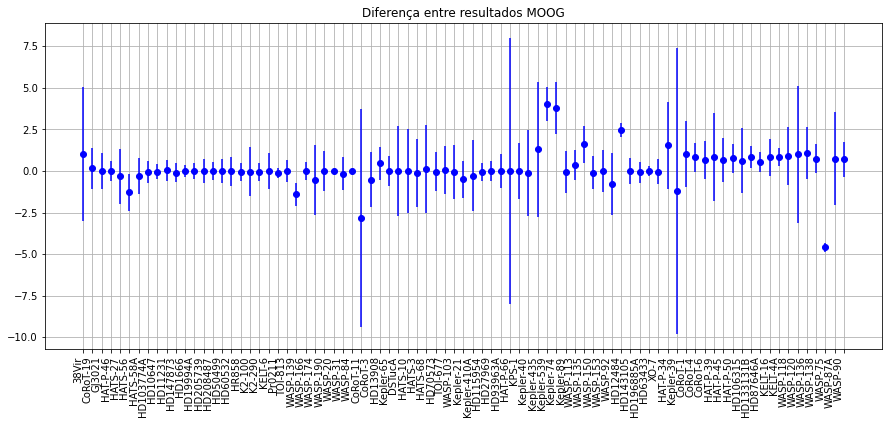

In [397]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.grid()
ax.errorbar(diff2[0],diff2[1],yerr=diff2[2], fmt="bo")
plt.xticks(rotation=90, ha='right')
#plt.ylim(min(diff[1])-1,10)
#plt.legend()
plt.title('Diferença entre resultados MOOG')
plt.show()

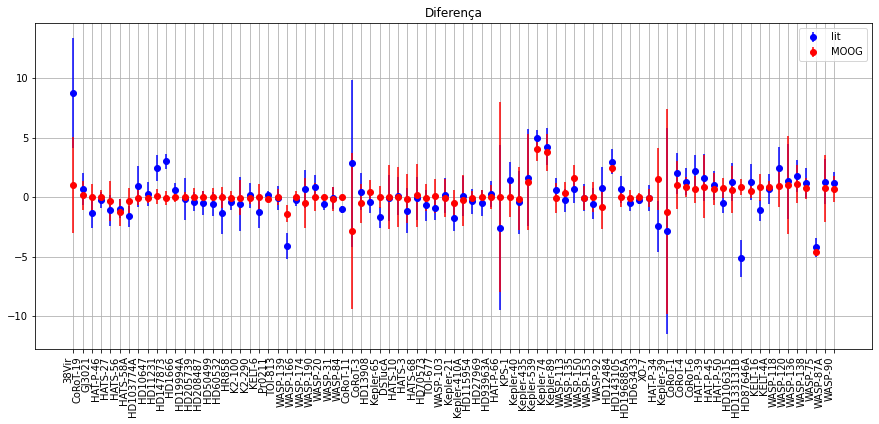

In [398]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.grid()
ax.errorbar(diff[0],diff[1],yerr=diff[2], fmt="bo",label='lit')
ax.errorbar(diff2[0],diff2[1],yerr=diff2[2], fmt="ro",label='MOOG')
plt.xticks(rotation=90, ha='right')
#plt.ylim(min(diff[1])-1,10)
#plt.legend()
plt.title('Diferença')
plt.legend()
plt.show()

---------------------------

In [442]:
np.loadtxt("/home/spec/WORK/PEEC-2024/_nasa_table.txt", dtype='str', usecols=0)

array(['hostname', '11', '11', ..., 'ups', 'ups', 'xi'], dtype='<U13')